In [1]:
# install
# reading img or vid
# draw results
# handling multiple lines


In [2]:
! pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [3]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 25.2 MB/s eta 0:00:00


In [11]:
img_path = "surf.jpeg"

In [12]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np

reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(img_path)
result

[([[np.int32(18), np.int32(18)],
   [np.int32(293), np.int32(18)],
   [np.int32(293), np.int32(145)],
   [np.int32(18), np.int32(145)]],
  'SURF',
  np.float64(0.9862082600593567))]

In [16]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

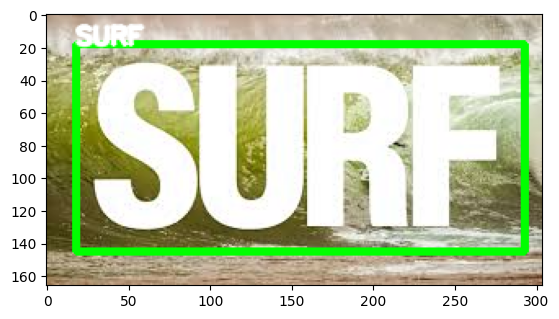

In [17]:
img = cv2.imread(img_path)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [18]:
# 2nd image

In [34]:
IMG_PATH = "service.jpg"
reader = easyocr.Reader(['en'], gpu=False)
result = reader.readtext(img_path)
result

[([[np.int32(44), np.int32(44)],
   [np.int32(401), np.int32(44)],
   [np.int32(401), np.int32(120)],
   [np.int32(44), np.int32(120)]],
  'DO NOT USE',
  np.float64(0.7980063713734192)),
 ([[np.int32(51), np.int32(415)],
   [np.int32(397), np.int32(415)],
   [np.int32(397), np.int32(499)],
   [np.int32(51), np.int32(499)]],
  'OUT OF',
  np.float64(0.9584087100812546)),
 ([[np.int32(59), np.int32(493)],
   [np.int32(392), np.int32(493)],
   [np.int32(392), np.int32(577)],
   [np.int32(59), np.int32(577)]],
  'ORDER',
  np.float64(0.9929668695414037))]

In [35]:
result[2]

([[np.int32(59), np.int32(493)],
  [np.int32(392), np.int32(493)],
  [np.int32(392), np.int32(577)],
  [np.int32(59), np.int32(577)]],
 'ORDER',
 np.float64(0.9929668695414037))

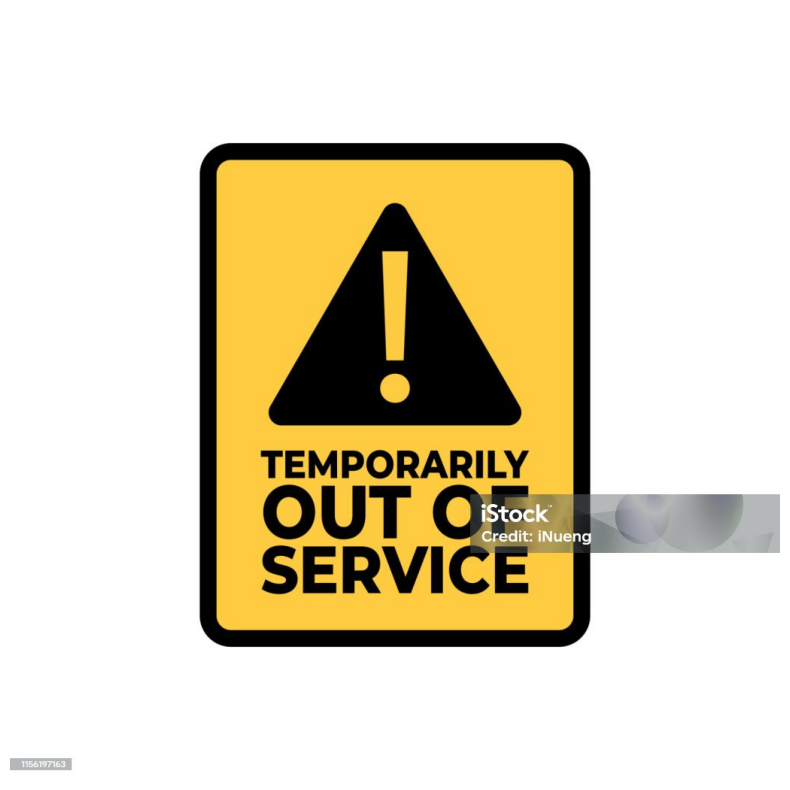

In [43]:
# Load image
img = cv2.imread(IMG_PATH)

# Make a copy to draw on
img_draw = img.copy()
for detection in result:
  top_left = tuple([int(val) for val in detection [0][0]])
  bottom_right = tuple([int(val) for val in detection[0][2]])
  text = detection[1]
  img = cv2.FONT_HERSHEY_SIMPLEX
  img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),5)
  img = cv2.putText(img,text,top_left, font, 4,(255,255,255),2,cv2.LINE_AA)

# Convert BGR to RGB for plt.imshow
img_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)
# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

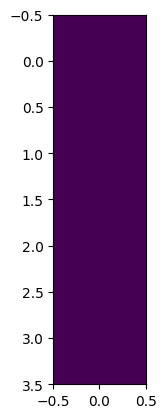

In [39]:
img1 = cv2.imread(img_path)
spacer = 100
for detection in result:
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15

plt.imshow(img)
plt.show()

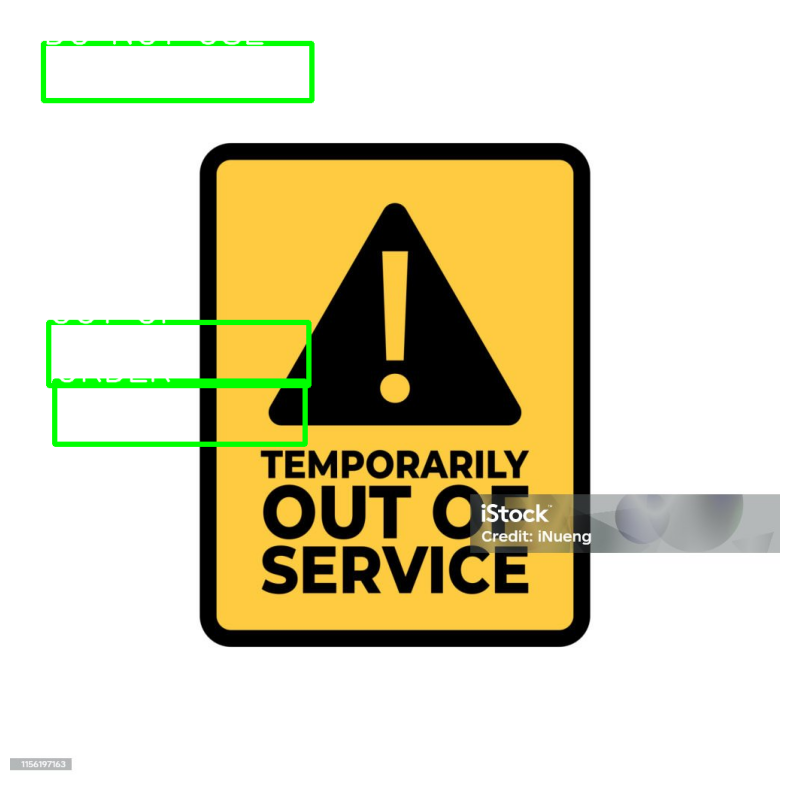

In [40]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread(IMG_PATH)

# Make a copy to draw on
img_draw = img.copy()

# Assume result is a list of detections in the format: [((x1, y1), (x2, y2)), "label"]
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]

    font = cv2.FONT_HERSHEY_SIMPLEX
    img_draw = cv2.rectangle(img_draw, top_left, bottom_right, (0, 255, 0), 5)
    img_draw = cv2.putText(img_draw, text, top_left, font, 1.5, (255, 255, 255), 2, cv2.LINE_AA)

# Convert BGR to RGB for plt.imshow
img_rgb = cv2.cvtColor(img_draw, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img_rgb)
plt.axis('off')
plt.show()
